<a href="https://colab.research.google.com/github/14marcos1/Geral01/blob/main/ELT574_MATRICULA_51687_Atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np



In [12]:
from google.colab import files
uploaded = files.upload()


Saving musicas_spotify_limpo.csv to musicas_spotify_limpo (1).csv


In [13]:
# df = pd.read_csv('musicas_spotify_limpo.csv')
df = pd.read_csv("musicas_spotify_limpo.csv")
df.head()


,danceability,energy,loudness,tempo,valence
0,0.786,0.667,-8.272,102.046,0.688
1,0.571,0.739,-11.163,93.105,0.818
2,0.286,0.929,-8.494,99.762,0.127
3,0.725,0.607,-7.486,129.971,0.570
4,0.184,0.161,-18.261,86.351,0.087


In [14]:
# Seleção das variáveis do problema
features = ['danceability', 'energy', 'loudness', 'tempo', 'valence']
X = df[features].dropna()


In [15]:
# Normalização dos dados (essencial para que o tempo/BPM não domine os outros valores)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dados normalizados e prontos para o K-means.")

Dados normalizados e prontos para o K-means.


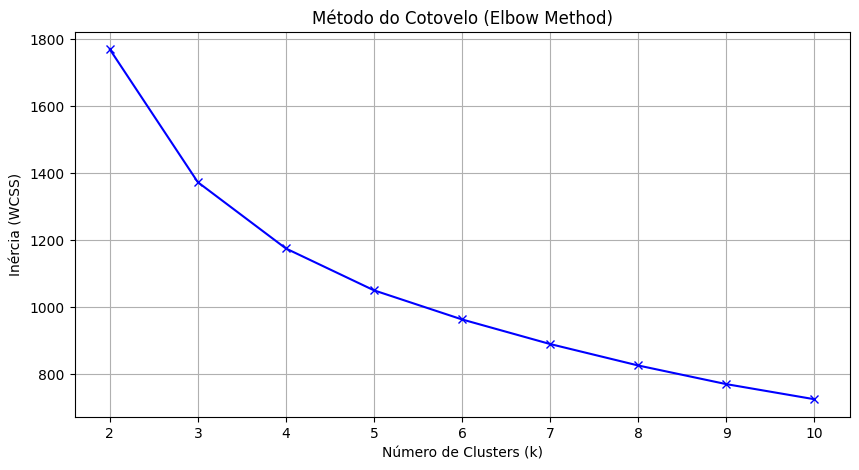

In [16]:
wcss = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (WCSS)')
plt.title('Método do Cotovelo (Elbow Method)')
plt.grid(True)
plt.show()

In [19]:
import matplotlib.cm as cm


Para k = 2, o score médio da silhueta é: 0.3422


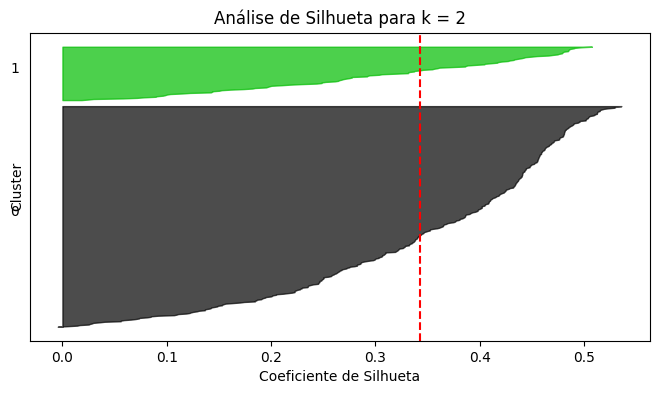

Para k = 3, o score médio da silhueta é: 0.2624


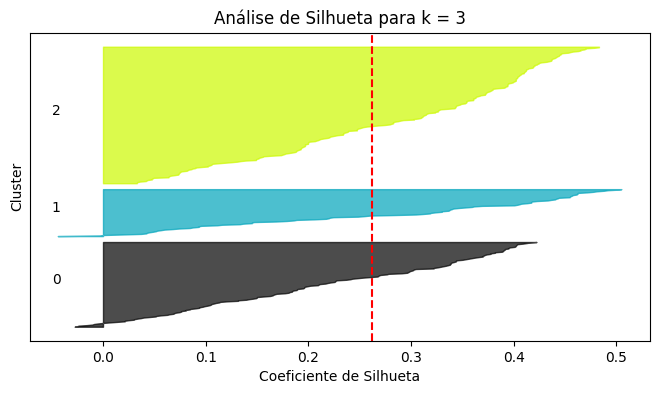

Para k = 4, o score médio da silhueta é: 0.2468


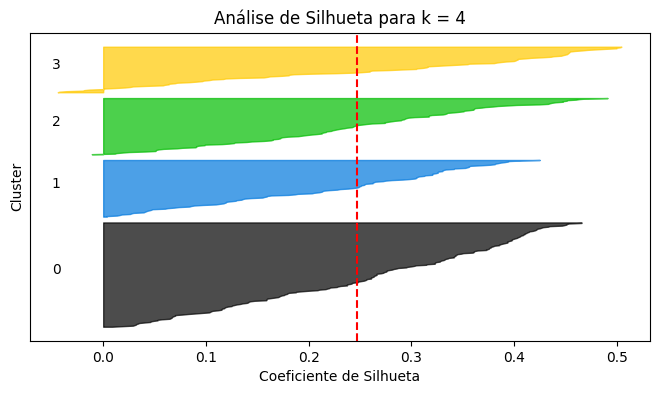

In [20]:
def plot_silhouette(data, k_list):
    for n_clusters in k_list:
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(8, 4)

        clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = clusterer.fit_predict(data)

        silhouette_avg = silhouette_score(data, cluster_labels)
        print(f"Para k = {n_clusters}, o score médio da silhueta é: {silhouette_avg:.4f}")

        sample_values = silhouette_samples(data, cluster_labels)
        y_lower = 10

        for i in range(n_clusters):
            ith_cluster_values = sample_values[cluster_labels == i]
            ith_cluster_values.sort()
            size_cluster_i = ith_cluster_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        ax1.set_title(f"Análise de Silhueta para k = {n_clusters}")
        ax1.set_xlabel("Coeficiente de Silhueta")
        ax1.set_ylabel("Cluster")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        plt.show()

# Testando os Ks sugeridos pelo gráfico do cotovelo
plot_silhouette(X_scaled, [2, 3, 4])

In [21]:
# Aplicando o modelo com k=3
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans_final.fit_predict(X_scaled)

print("Perfil médio de cada cluster encontrado:")
df.groupby('cluster').mean()

Perfil médio de cada cluster encontrado:


,danceability,energy,loudness,tempo,valence
cluster,,,,,
0,0.452025,0.752671,-6.328734,140.289563,0.332936
1,0.413955,0.247252,-15.015477,110.084534,0.249024
2,0.680024,0.696264,-6.745433,112.192028,0.668831
